In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('karan_90_left.csv')
df.head()

,acc_x,acc_y,acc_z,I0,I1,I2,I3,time(sec)
0,7.26,-6.83,3.61,0,1,0,0,0.0
1,7.14,-6.79,3.53,0,1,0,0,0.2
2,7.18,-6.83,3.37,0,1,0,0,0.4
3,7.22,-6.86,3.37,0,1,0,2,0.6
4,7.18,-6.79,3.30,0,1,0,2,0.8


In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import heartpy as hp

from scipy.signal import savgol_filter
from scipy.signal import butter, lfilter
from scipy.signal import find_peaks
from scipy.stats import zscore

In [4]:
!pip install heartpy


In [5]:

acc_x = np.array(df['acc_x'])
acc_y = np.array(df['acc_y'])
acc_z = np.array(df['acc_z'])

In [6]:
# Stampa i primi valori delle tre colonne
print("acc_x:", df['acc_x'].tolist())
print("acc_y:", df['acc_y'].tolist())
print("acc_z:", df['acc_z'].tolist())

acc_x: [7.26, 7.14, 7.18, 7.22, 7.18, 7.18, 7.26, 7.22, 7.26, 7.3, 7.26, 7.26, 7.22, 7.18, 7.22, 7.22, 7.26, 7.3, 7.37, 7.18, 7.3, 7.26, 7.3, 7.26, 7.3, 7.34, 7.3, 7.3, 7.26, 7.22, 7.3, 7.3, 7.26, 7.26, 7.3, 7.26, 7.37, 7.26, 7.3, 7.34, 7.26, 7.26, 7.22, 7.26, 7.3, 7.22, 7.26, 7.3, 7.26, 7.3, 7.18, 7.26, 7.18, 7.26, 7.3, 7.34, 7.26, 7.26, 7.34, 7.34, 7.34, 7.22, 7.3, 7.34, 7.34, 7.3, 7.37, 7.34, 7.3, 7.3, 7.3, 7.18, 7.26, 7.34, 7.26, 7.37, 7.3, 7.34, 7.34, 7.34, 7.34, 7.34, 7.34, 7.34, 7.26, 7.22, 7.26, 7.26, 7.34, 7.3, 7.26, 7.34, 7.26, 7.37, 7.3, 7.34, 7.37, 7.37, 7.3, 7.26, 7.26, 7.18, 7.22, 7.26, 7.3, 7.3, 7.22, 7.34, 7.3, 7.3, 7.37, 7.37, 7.37, 7.34, 7.26, 7.3, 7.26, 7.26, 7.34, 7.3, 7.34, 7.3, 7.34, 7.34, 7.34, 7.34, 7.26, 7.26, 7.22, 7.18, 7.22, 7.26, 7.26, 7.22, 7.3, 7.3, 7.26, 7.3, 7.26, 7.34, 7.3, 7.34, 7.26, 7.26, 7.18, 7.18, 7.26, 7.26, 7.18, 7.3, 7.3, 7.26, 7.3, 7.3, 7.26, 7.22, 7.22, 7.22, 7.26, 7.22, 7.22, 7.18, 7.22, 7.26, 7.34, 7.26, 7.22, 7.26, 7.3, 7.3, 7.26, 7.3, 7.

In [7]:
df.shape

(618, 8)

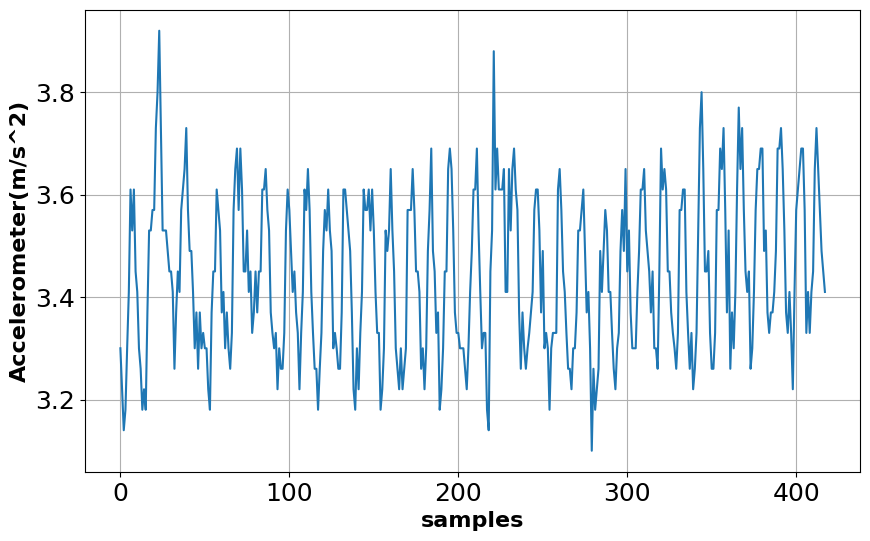

In [8]:
accelerometer_data_raw = acc_z[200:]
%matplotlib inline
plt.figure(figsize=(10, 6))
ax=plt.axis()
plt.plot(accelerometer_data_raw )
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)    
plt.xlabel('samples', fontsize=16, fontweight='bold')
plt.ylabel('Accelerometer(m/s^2)', fontsize=16, fontweight='bold')
# plt.title('90° left Sensor values vs Time', fontsize=16, fontweight='bold')
# plt.title('60(deg) sensor values vs time', fontsize=16, fontweight='bold')
plt.grid()
# plt.legend([str(i) for i in range(1, 5)], loc="lower right",fontsize="15", bbox_to_anchor=(1.15, 0.05))
plt.show()

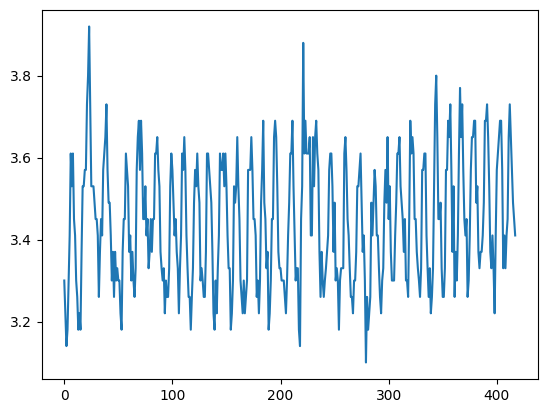

In [9]:
accelerometer_data_raw = np.abs(accelerometer_data_raw)
plt.plot(accelerometer_data_raw)

In [10]:
filter_order=4
normalized_cutoff_frequency=18/50
b, a = butter(filter_order, normalized_cutoff_frequency, btype='high', analog=False, output='ba')
signal_high = lfilter(b, a, accelerometer_data_raw)

In [11]:
signal_high.shape

(418,)

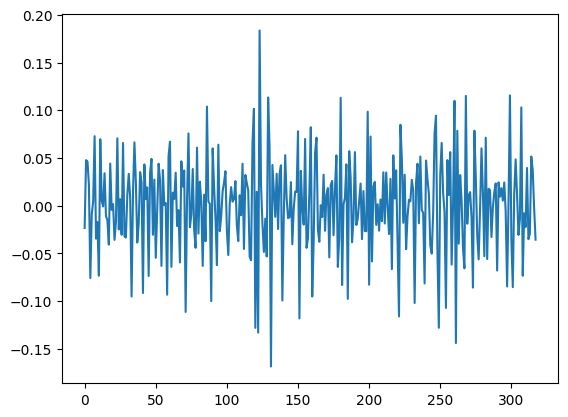

In [12]:
signal_high=signal_high[100:]
plt.plot(signal_high)

In [13]:
signal_high = zscore(signal_high)

In [14]:
# Definizione threshold (80% della deviazione standard dell'energia del segnale)
signal_high = abs(signal_high)
threshold =(np.std(np.square(signal_high)))*0.8
print(threshold)

1.293793717905904


In [15]:
peaks_filtered, _ = find_peaks(signal_high, height=threshold, distance=25) 
print(peaks_filtered)

[  4  33  71 123 151 180 221 261 299]


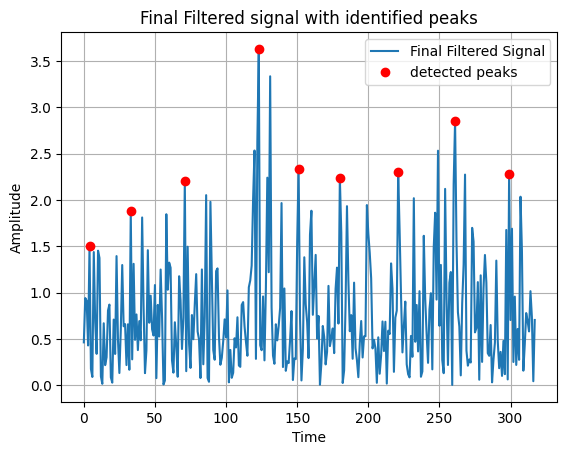

In [16]:
plt.plot(signal_high, label='Final Filtered Signal')
plt.plot(peaks_filtered, signal_high[peaks_filtered], 'ro', label='detected peaks')

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Final Filtered signal with identified peaks')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
interval_filtered = np.diff(peaks_filtered) / 50
print(interval_filtered)
HR_interval = 60 / np.mean(interval_filtered)
print(HR_interval)

[0.58 0.76 1.04 0.56 0.58 0.82 0.8  0.76]
81.35593220338983


In [18]:
df1=pd.read_csv('karan_60_gt.csv')
df1.head()

,gr,number
0,80,0
1,79,1
2,78,2
3,76,3
4,75,4


In [19]:
df1.mean()

gr        79.037975
number    39.000000
dtype: float64

In [20]:
df2= pd.read_csv('karan_90.csv')
df2.head()

,acc_x,acc_y,acc_z,I0,I1,I2,I3,time(sec)
0,8.00,-5.77,3.73,38,38,38,78,0.0
1,8.04,-5.84,3.73,39,39,39,78,0.2
2,7.96,-5.73,3.57,39,39,38,79,0.4
3,8.04,-5.73,3.57,39,39,38,79,0.6
4,7.92,-5.96,3.57,40,41,39,81,0.8


In [21]:
df3= pd.read_csv('karan_120.csv')
df3.head()

,acc_x,acc_y,acc_z,I0,I1,I2,I3,time(sec)
0,8.36,-5.37,3.30,21,21,21,62,0.0
1,8.39,-5.45,3.26,21,21,21,61,0.2
2,8.36,-5.41,3.37,21,21,21,61,0.4
3,8.32,-5.33,3.37,20,20,20,61,0.6
4,8.36,-5.37,3.49,21,21,21,63,0.8


In [22]:
acc_x = np.array(df2['acc_x'])
acc_y = np.array(df2['acc_y'])
acc_z = np.array(df2['acc_z'])

In [23]:
df2.shape

(686, 8)

In [24]:
df3.shape

(640, 8)

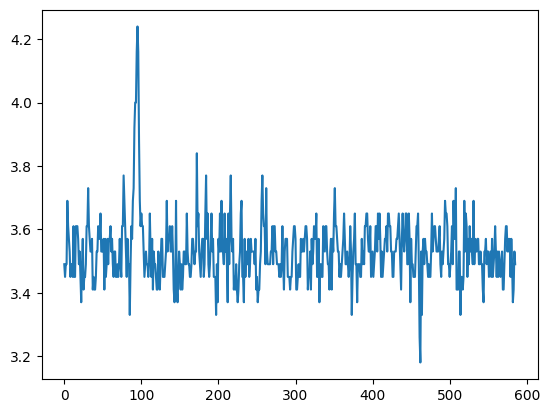

In [25]:
accelerometer_data_raw = acc_z[100:]
plt.plot(accelerometer_data_raw )

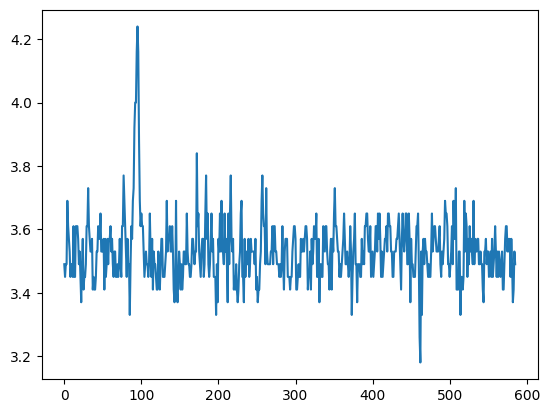

In [26]:
accelerometer_data_raw = np.abs(accelerometer_data_raw)
plt.plot(accelerometer_data_raw)

In [27]:
filter_order=4
normalized_cutoff_frequency=18/50
b, a = butter(filter_order, normalized_cutoff_frequency, btype='high', analog=False, output='ba')
signal_high = lfilter(b, a, accelerometer_data_raw)
signal_high.shape

(586,)

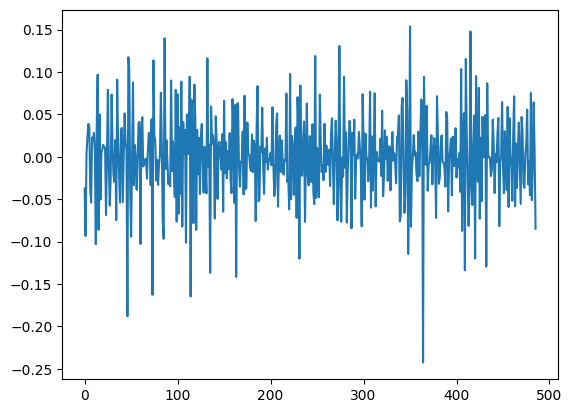

In [28]:
signal_high=signal_high[100:]
plt.plot(signal_high)

In [29]:
signal_high = zscore(signal_high)
signal_high = abs(signal_high)
threshold =(np.std(np.square(signal_high)))*0.8
print(threshold)

1.499120543782585


In [30]:
peaks_filtered, _ = find_peaks(signal_high, height=threshold, distance=25) 
print(peaks_filtered)

[ 12  46  73 114 163 231 274 307 364 415 446]


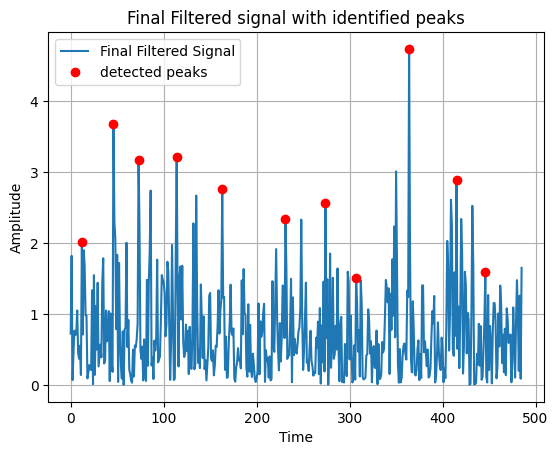

In [31]:
plt.plot(signal_high, label='Final Filtered Signal')
plt.plot(peaks_filtered, signal_high[peaks_filtered], 'ro', label='detected peaks')

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Final Filtered signal with identified peaks')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
interval_filtered = np.diff(peaks_filtered) / 50
print(interval_filtered)
HR_interval = 60 / np.mean(interval_filtered)
print(HR_interval)

[0.68 0.54 0.82 0.98 1.36 0.86 0.66 1.14 1.02 0.62]
69.12442396313367


In [33]:
df2_gt=pd.read_csv('karan_90_gt.csv')
df2_gt.head()

,gr,number
0,70,0
1,66,1
2,65,2
3,64,3
4,65,4


In [34]:
df2_gt.mean()

gr        80.027027
number    36.500000
dtype: float64

In [35]:
df['acc_x'].shape
len(acc_x)

686

Estimated Heart Rate: 83.37931034482759 BPM


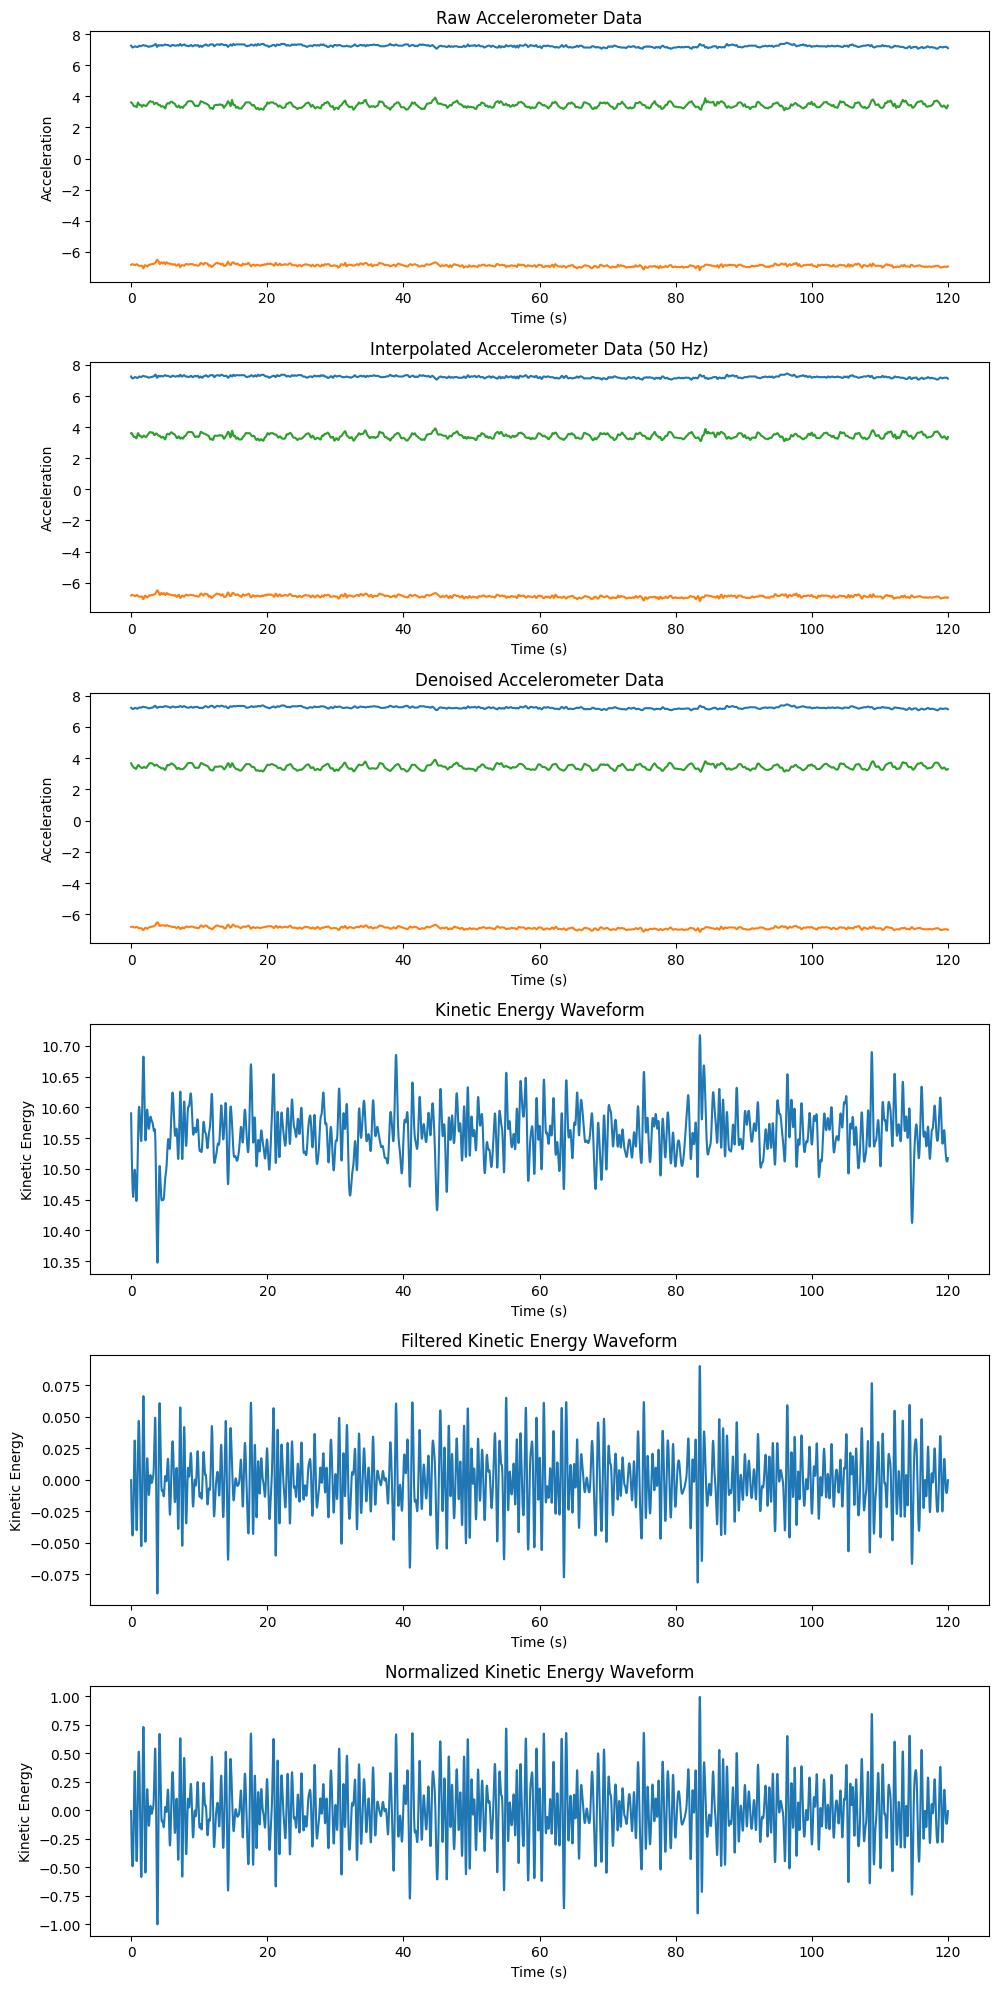

In [36]:
import numpy as np
from scipy import interpolate, signal, fft
from scipy.signal import savgol_filter, butter, filtfilt
import matplotlib.pyplot as plt

# Step 1: Data Interpolation
def interpolate_signal(time, signal, target_rate=50):
    target_time = np.arange(time[0], time[-1], 1/target_rate)
    interpolated_signal = interpolate.CubicSpline(time, signal, axis=0)(target_time)
    return target_time, interpolated_signal

# Step 2: Noise Reduction using Savitzky-Golay filter
def reduce_noise(signal, window_size=31, poly_order=2):
    return savgol_filter(signal, window_size, poly_order, axis=0)

# Step 3: Kinetic Energy Calculation (L2-normalization)
def kinetic_energy(accel_data):
    return np.linalg.norm(accel_data, axis=1)

# Step 4: Bandpass Filtering
def bandpass_filter(signal, lowcut, highcut, fs, order=2):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Step 5: Normalization and Averaging
def normalize_and_average(signal):
    return signal / np.max(np.abs(signal))

# Step 6: Heart Rate Calculation using SFFT
def calculate_heart_rate(signal, fs=50, window_size=5, interval_size=1, freq_range=(0.75, 2.5)):
    window_samples = window_size * fs
    interval_samples = interval_size * fs
    heart_rates = []
    
    for start in range(0, len(signal) - window_samples + 1, interval_samples):
        windowed_signal = signal[start:start + window_samples]
        spectrum = fft.fft(windowed_signal)
        frequencies = fft.fftfreq(len(spectrum), d=1/fs)
        
        # Only consider the positive half of the frequency spectrum
        positive_frequencies = frequencies[:len(frequencies) // 2]
        positive_spectrum = np.abs(spectrum[:len(spectrum) // 2])
        
        # Find the dominant frequency within the specified range
        mask = (positive_frequencies >= freq_range[0]) & (positive_frequencies <= freq_range[1])
        dominant_freq = positive_frequencies[mask][np.argmax(positive_spectrum[mask])]
        
        # Calculate heart rate
        heart_rate = dominant_freq * 60  # Convert to beats per minute
        heart_rates.append(heart_rate)
    
    return np.mean(heart_rates)

# Main processing function for accelerometer data
def process_accelerometer_data(time_acc, acc_data):
    # Interpolate signals to 50 Hz
    time_acc_50, acc_data_50 = interpolate_signal(time_acc, acc_data)
    
    # Reduce noise using Savitzky-Golay filter
    acc_data_denoised = reduce_noise(acc_data_50)
    
    # Calculate kinetic energy waveforms
    acc_energy = kinetic_energy(acc_data_denoised)
    
    # Bandpass filter the kinetic energy waveforms
    acc_energy_filtered = bandpass_filter(acc_energy, 0.8, 10, 50)
    
    # Normalize and average the energy waveforms
    acc_energy_normalized = normalize_and_average(acc_energy_filtered)
    
    # Calculate heart rate
    heart_rate = calculate_heart_rate(acc_energy_normalized)
    
    return time_acc_50, acc_data_50, acc_data_denoised, acc_energy, acc_energy_filtered, acc_energy_normalized, heart_rate

# Example usage (replace with actual data)
time_acc = np.linspace(0, 120, 600)  # Replace with actual time stamps for accelerometer
acc_x = np.array(df['acc_x'])[:600]  # Assuming 600 samples for the example
acc_y = np.array(df['acc_y'])[:600]  # Assuming 600 samples for the example
acc_z = np.array(df['acc_z'])[:600]  # Assuming 600 samples for the example
acc_data = np.column_stack((acc_x, acc_y, acc_z))

time_acc_50, acc_data_50, acc_data_denoised, acc_energy, acc_energy_filtered, acc_energy_normalized, heart_rate = process_accelerometer_data(time_acc, acc_data)
print(f"Estimated Heart Rate: {heart_rate} BPM")

# Plot the results
fig, axs = plt.subplots(6, 1, figsize=(10, 20))

axs[0].plot(time_acc, acc_data)
axs[0].set_title('Raw Accelerometer Data')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Acceleration')

axs[1].plot(time_acc_50, acc_data_50)
axs[1].set_title('Interpolated Accelerometer Data (50 Hz)')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Acceleration')

axs[2].plot(time_acc_50, acc_data_denoised)
axs[2].set_title('Denoised Accelerometer Data')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Acceleration')

axs[3].plot(time_acc_50, acc_energy)
axs[3].set_title('Kinetic Energy Waveform')
axs[3].set_xlabel('Time (s)')
axs[3].set_ylabel('Kinetic Energy')

axs[4].plot(time_acc_50, acc_energy_filtered)
axs[4].set_title('Filtered Kinetic Energy Waveform')
axs[4].set_xlabel('Time (s)')
axs[4].set_ylabel('Kinetic Energy')

axs[5].plot(time_acc_50, acc_energy_normalized)
axs[5].set_title('Normalized Kinetic Energy Waveform')
axs[5].set_xlabel('Time (s)')
axs[5].set_ylabel('Kinetic Energy')

plt.tight_layout()
plt.show()



In [37]:
# Example usage (replace with actual data)
time_acc = np.linspace(0, 120, 600)  # Replace with actual time stamps for accelerometer
acc_x = np.array(df['acc_x'])[:600]  # Assuming 600 samples for the example
acc_y = np.array(df['acc_y'])[:600]  # Assuming 600 samples for the example
acc_z = np.array(df['acc_z'])[:600]  # Assuming 600 samples for the example
acc_data = np.column_stack((acc_x, acc_y, acc_z))  # Combine all three axes

time_acc_50, acc_data_50, acc_data_denoised, acc_energy, acc_energy_filtered, acc_energy_normalized, heart_rate = process_accelerometer_data(time_acc, acc_data)
print(f"Estimated Heart Rate: {heart_rate} BPM")

# Check lengths of time_acc_50 and acc_data_50
print("Length of time_acc_50:", len(time_acc_50))
print("Length of acc_data_50:", len(acc_data_50))

# Plot the results (remaining code stays the same)


Estimated Heart Rate: 83.37931034482759 BPM
Length of time_acc_50: 6000
Length of acc_data_50: 6000


In [38]:
df3=pd.read_csv('pranav_90_left.csv')

In [39]:
df3.shape

(601, 8)

In [40]:
# Example usage (replace with actual data)
time_acc = np.linspace(0, 120, 600)  # Replace with actual time stamps for accelerometer
acc_x = np.array(df3['acc_x'])[:600]  # Assuming 600 samples for the example
acc_y = np.array(df3['acc_y'])[:600]  # Assuming 600 samples for the example
acc_z = np.array(df3['acc_z'])[:600]  # Assuming 600 samples for the example
acc_data = np.column_stack((acc_x, acc_y, acc_z))  # Combine all three axes

time_acc_50, acc_data_50, acc_data_denoised, acc_energy, acc_energy_filtered, acc_energy_normalized, heart_rate = process_accelerometer_data(time_acc, acc_data)
print(f"Estimated Heart Rate: {heart_rate} BPM")

# Check lengths of time_acc_50 and acc_data_50
print("Length of time_acc_50:", len(time_acc_50))
print("Length of acc_data_50:", len(acc_data_50))

Estimated Heart Rate: 75.62068965517241 BPM
Length of time_acc_50: 6000
Length of acc_data_50: 6000


In [41]:
df4=pd.read_csv('acc_2.csv')
df4.head()

,acc_z,acc_y,acc_x
0,-0.185085,0.022916,-0.001404
1,-0.077371,0.099772,0.057607
2,-0.142864,0.122570,0.072837
3,-0.151565,0.120388,0.084763
4,-0.219784,0.086923,0.088105


In [42]:
df4.shape

(3000, 3)

In [43]:

acc_x = np.array(df4['acc_x'])
acc_y = np.array(df4['acc_y'])
acc_z = np.array(df4['acc_z'])

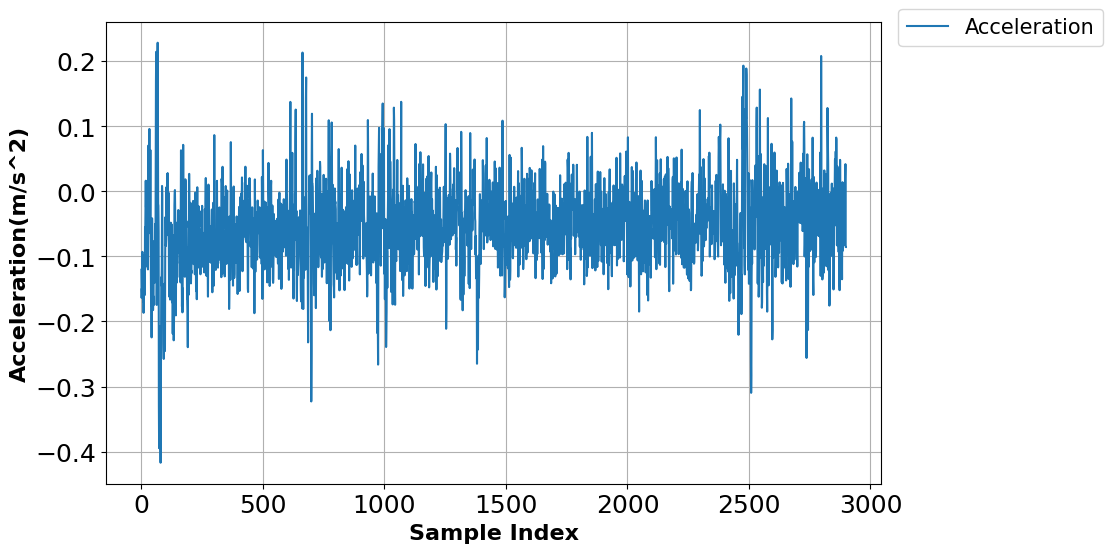

In [44]:
accelerometer_data_raw = acc_z[100:]
%matplotlib inline
plt.figure(figsize=(10, 6))
ax=plt.axis()
plt.plot(accelerometer_data_raw )
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)    
plt.xlabel('Sample Index', fontsize=16, fontweight='bold')
plt.ylabel('Acceleration(m/s^2)', fontsize=16, fontweight='bold')
# plt.title('90° left Sensor values vs Time', fontsize=16, fontweight='bold')
# plt.title('60(deg) sensor values vs time', fontsize=16, fontweight='bold')
plt.grid()
plt.legend(['Acceleration'], loc="upper right",fontsize="15", bbox_to_anchor=(1.30, 1.05))
plt.show()

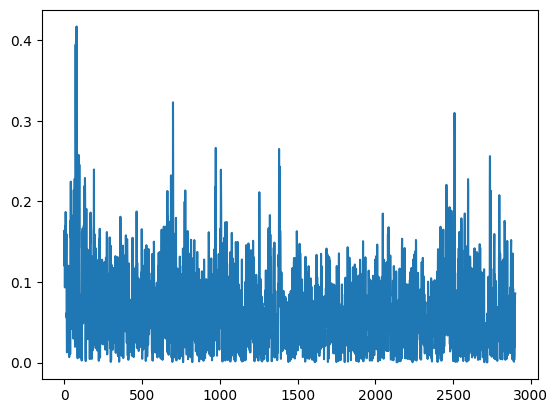

In [45]:
accelerometer_data_raw = np.abs(accelerometer_data_raw)
plt.plot(accelerometer_data_raw)

In [46]:
filter_order=4
normalized_cutoff_frequency=18/50
b, a = butter(filter_order, normalized_cutoff_frequency, btype='high', analog=False, output='ba')
signal_high = lfilter(b, a, accelerometer_data_raw)
signal_high.shape

(2900,)

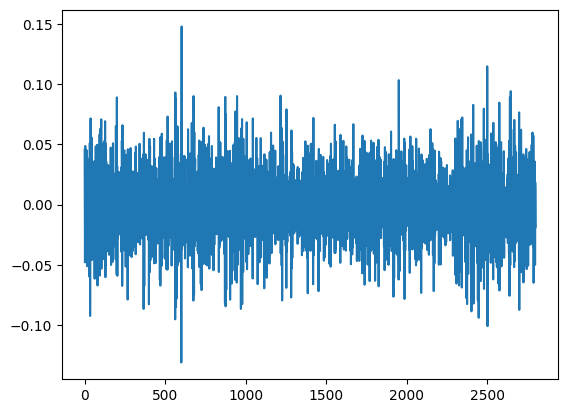

In [47]:
signal_high=signal_high[100:]
plt.plot(signal_high)

In [48]:
signal_high = zscore(signal_high)
signal_high = abs(signal_high)
threshold =(np.std(np.square(signal_high)))*0.8
print(threshold)

1.3031703413971902


In [49]:
peaks_filtered, _ = find_peaks(signal_high, height=threshold, distance=25) 
print(peaks_filtered)

[   4   34   62  103  129  164  200  233  267  292  341  366  399  431
  470  515  562  602  642  676  726  772  800  832  873  903  946  978
 1006 1044 1074 1115 1157 1183 1216 1253 1282 1349 1385 1420 1452 1485
 1527 1553 1588 1624 1668 1705 1738 1769 1795 1825 1862 1888 1917 1950
 1986 2018 2058 2089 2137 2167 2199 2286 2316 2344 2374 2401 2446 2499
 2537 2574 2602 2645 2672 2698 2724 2753 2787]


In [50]:
interval_filtered = np.diff(peaks_filtered) / 50
print(interval_filtered)
HR_interval = 60 / np.mean(interval_filtered)
print(HR_interval)

[0.6  0.56 0.82 0.52 0.7  0.72 0.66 0.68 0.5  0.98 0.5  0.66 0.64 0.78
 0.9  0.94 0.8  0.8  0.68 1.   0.92 0.56 0.64 0.82 0.6  0.86 0.64 0.56
 0.76 0.6  0.82 0.84 0.52 0.66 0.74 0.58 1.34 0.72 0.7  0.64 0.66 0.84
 0.52 0.7  0.72 0.88 0.74 0.66 0.62 0.52 0.6  0.74 0.52 0.58 0.66 0.72
 0.64 0.8  0.62 0.96 0.6  0.64 1.74 0.6  0.56 0.6  0.54 0.9  1.06 0.76
 0.74 0.56 0.86 0.54 0.52 0.52 0.58 0.68]
84.08192597915918


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


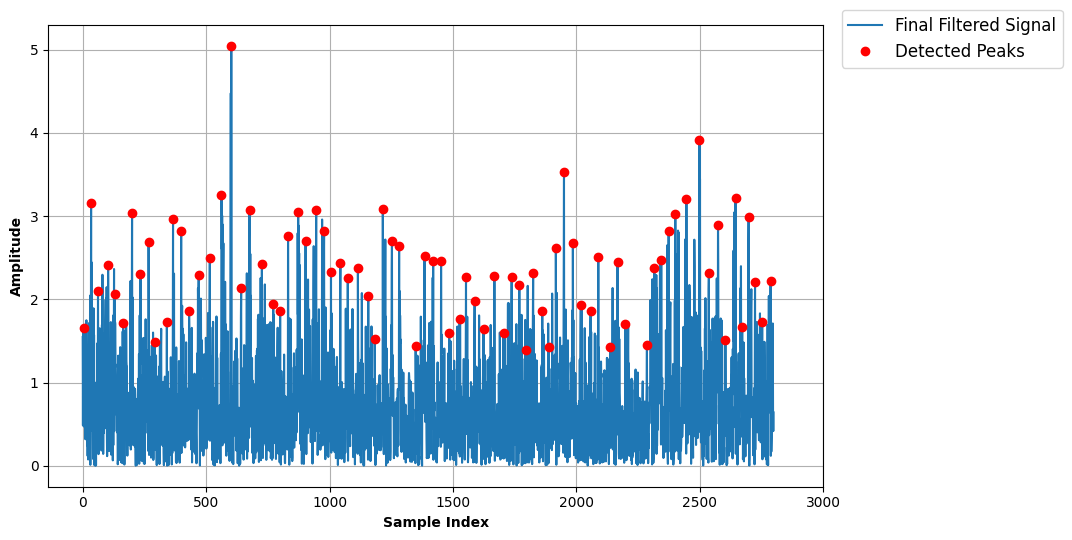

In [51]:
plt.figure(figsize=(10, 6))
ax=plt.axis()
plt.plot(signal_high)
plt.plot(peaks_filtered, signal_high[peaks_filtered], 'ro')
plt.xticks(np.arange(0, 3001, 500))
plt.xlabel('Sample Index',fontweight='bold')
plt.ylabel('Amplitude',fontweight='bold')
# plt.title('Final Filtered signal with identified peaks')
plt.legend()
plt.grid(True)
plt.legend(["Final Filtered Signal", "Detected Peaks"], loc="upper right", fontsize="12", bbox_to_anchor=(1.32, 1.05))
plt.show()